# Linear Regression

## Importing data

In [54]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [55]:
#!pip list

In [56]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
# Importing the datasets
df = pd.read_csv('auto.csv')

In [58]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,2.890372,8,5.726848,0,3504,12.000000,70,0
1,2.708050,8,5.857933,1,3693,11.500000,70,0
2,2.890372,8,5.762051,2,3436,11.000000,70,0
3,2.772589,8,5.717028,2,3433,12.000000,70,0
4,2.833213,8,5.710427,3,3449,10.500000,70,0
...,...,...,...,...,...,...,...,...
392,3.295837,4,4.941642,30,2790,15.600000,82,0
393,3.784190,4,4.574711,56,2130,23.838241,82,1
394,3.465736,4,4.905275,89,2295,11.600000,82,0
395,3.332205,4,4.787492,67,2625,18.600000,82,0


# Correlations

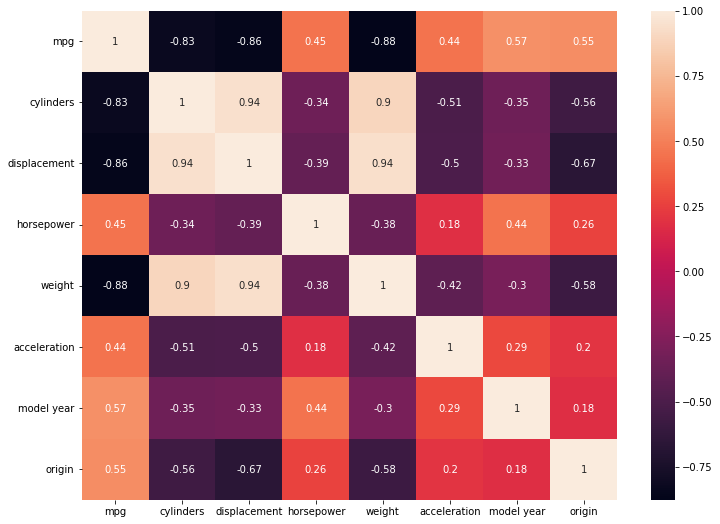

In [59]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Как видим одна из наибольшейх корреляций у нас у переменных mpg с horsepower . Поэтому, я буду строить однофакторную модель: зависимость этох факторов.

# Splitting

In [61]:
X = df.iloc[:, [False,True,True,True,True,True,True,True]]
y = df['mpg']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,5.726848,0,3504,12.000000,70,0
1,8,5.857933,1,3693,11.500000,70,0
2,8,5.762051,2,3436,11.000000,70,0
3,8,5.717028,2,3433,12.000000,70,0
4,8,5.710427,3,3449,10.500000,70,0
...,...,...,...,...,...,...,...
392,4,4.941642,30,2790,15.600000,82,0
393,4,4.574711,56,2130,23.838241,82,1
394,4,4.905275,89,2295,11.600000,82,0
395,4,4.787492,67,2625,18.600000,82,0


# Simple Linear Regression

In [62]:
f1 = ['horsepower']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([0.00646499]), 2.8909689325931236)

mpg=0.0064*horsepower+2.89

In [63]:
y_pred = sr.predict(X_test[f1])

sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.209, 0.149)

In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.3, 0.3)

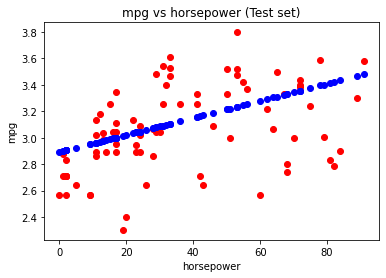

In [66]:
# Visualising the Test set results
plt.scatter(X_test['horsepower'], y_test, color = 'red')
plt.plot(X_test['horsepower'], sr.predict(X_test[f1]), 'bo')
plt.title('mpg vs horsepower (Test set)')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

# Multiple Linear Regression

In [67]:
!pip install statsmodels

In [68]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.888

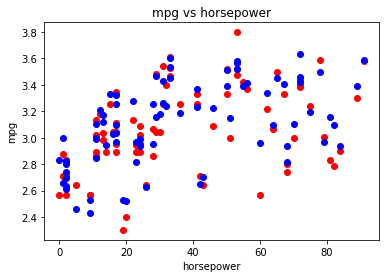

In [69]:
plt.scatter(X_test['horsepower'], y_test, color = 'red')
plt.plot(X_test['horsepower'], mr.predict(X_test), 'bo')
plt.title('mpg vs horsepower')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [70]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     348.4
Date:                Thu, 06 Jan 2022   Prob (F-statistic):          1.62e-142
Time:                        01:11:46   Log-Likelihood:                 238.62
No. Observations:                 317   AIC:                            -461.2
Df Residuals:                     309   BIC:                            -431.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0707      0.260      7.959      0.000       1.559       2.583
cylinders        0.0108      0.012      0.912      0.363      -0.012       0.034
displacement    -0.1437      0.054     -2.660      0.008      -0.250      -0.037
horsepower       0.0002      0.000      0.623      0.534      -0.000       0.001
weight          -0.0002   2.27e-05    -10.063      0.000      -0.000      -0.000
acceleration     0.0026      0.003      0.921      0.358      -0.003       0.008
model year       0.0308      0.002     15.381      0.000       0.027       0.035
origin           0.0170      0.011      1.494      0.136      -0.005       0.039
==============================================================================
Omnibus:                        5.477   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                7.791
Skew:                          -0.006   Prob(JB):                       0.0203
Kurtosis:                       3.768   Cond. No.                     1.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p, y_train)
pr.coef_, pr.intercept_

(array([-2.83812052e+06,  2.29989767e-01, -1.59427661e-02, -1.64275145e-02,
        -1.24756061e-04, -2.12327790e-01, -3.19174618e-01, -1.06991371e+00,
         1.82570753e-02, -1.36320404e-01,  2.15021132e-03, -2.57194542e-05,
         4.20914014e-02, -3.86590045e-03, -1.16800838e-02, -5.09887335e-02,
        -2.22047739e-03, -1.21113107e-04, -6.58705013e-03,  2.33607851e-02,
         1.06508138e-01, -1.30473028e-05, -6.97796028e-07,  1.30520860e-03,
        -4.22607094e-05,  1.28934706e-03,  2.68809079e-07, -4.23948352e-05,
        -7.80952560e-06,  3.01509144e-04,  1.54745997e-02, -5.34027337e-03,
         1.45441254e-03,  2.42125991e-03, -1.81341502e-03, -2.69059219e-02]),
 2838136.6059579113)

In [72]:
y_pred = pr.predict(X_test_p)
pr.score(X_train_p, y_train).round(3)

0.695

In [73]:
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.19, 0.2)

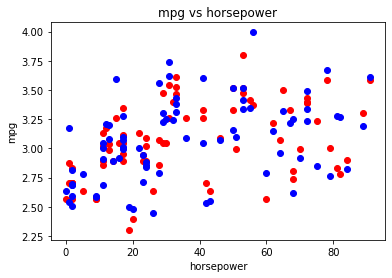

In [74]:
plt.scatter(X_test['horsepower'], y_test, color = 'red')
plt.plot(X_test['horsepower'], pr.predict(X_test_p), 'bo')
plt.title('mpg vs horsepower')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

# Pickle

In [75]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()